<a href="https://colab.research.google.com/github/Shreya0987/UberSupplyDemandGap-project/blob/main/UberSupplyDemandGap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EXPLORATORY DATA ANALYSIS OF UBER SUPPLY DEMAND GAP***




## PROJECT TYPE - EDA


##  CONTRIBUTION - SHREYA GHOSAL












## ***PROJECT SUMMARY -***

Introduction

In this project, we performed a comprehensive Exploratory Data Analysis (EDA) on Uber ride request data to uncover patterns in user demand, identify times and locations of service shortages, and assess driver availability. The main objective was to understand the supply-demand mismatch, which directly impacts customer experience and operational efficiency.

Dataset Overview

The dataset includes several columns such as Request timestamp, Pickup point, and Status (which indicates whether the trip was Completed, Cancelled, or No Cars Available). Each row represents a single ride request made by a customer.

Data Cleaning & Preprocessing

We began by converting the Request timestamp column to datetime format, then extracted features such as Hour and Day to enable time-based analysis. We also checked for and visualized missing values using a heatmap. Duplicate records and inconsistent data entries were addressed during the cleaning process to ensure data integrity.

Key Insights & Visualizations

1. Trip Request Distribution: A countplot of trip Status revealed that a significant portion of requests was either cancelled or had no cars available, clearly indicating a gap between demand and supply.

2. Hourly Trends: Using the Hour column, we found that peak demand occurs during morning (5–10 AM) and evening (5–10 PM) hours. However, supply during these hours does not scale proportionally, leading to unmet demand.

3. Pickup Point Impact: Visual analysis showed that most cancellations and ‘No Cars Available’ instances happened in the city during the morning rush, and at the airport during the evening. This suggests location-specific supply challenges.

4. Driver Availability: By filtering only the Trip Completed status, we estimated available supply by hour. When plotted against total demand, the gap between them became clearly visible, especially during peak hours.

5. Supply-Demand Gap Visualization: Bar plots and line charts comparing Total Requests, Trips Completed, and Unfulfilled Requests (cancelled/no car) were used to visually demonstrate the gap. This provided actionable insights into how Uber could improve allocation or incentivize driver availability during specific hours.

6. Categorical Comparisons: Countplots segmented by Pickup point and Status highlighted operational bottlenecks and helped understand the behavior of drivers and riders in different zones.

# ***PROBLEM STATEMENT***

Uber faces a recurring operational challenge where rider demand often exceeds driver supply, particularly during specific time slots and at certain pickup locations such as airports and city centers. This results in frequent ride cancellations, unavailability of cars, and ultimately, poor customer experience and revenue loss.

To address this issue, we conducted a comprehensive data analysis project using Exploratory Data Analysis (EDA) in Python and Excel dashboards The goal was to:

1. Identify peak hours of demand and supply shortages

2. Understand the geographic and temporal distribution of unfulfilled ride requests

3. Evaluate trip status patterns (Completed, Cancelled, No Cars Available)

4. Derive actionable insights to optimize driver allocation and availability

Using Excel, we created pivot tables and visual dashboards to get a quick overview of demand trends and supply bottlenecks. . Finally, EDA in Python helped us visualize and interpret the data through advanced plots and statistical summaries.

This combined approach enabled us to uncover the underlying patterns and recommend targeted strategies like incentive programs, time-based driver scheduling, and predictive allocation to help Uber balance supply with demand more effectively.



# ***LET'S BEGIN !***

# 1. Import the dataset

In [6]:
import pandas as pd

In [8]:
path="/content/drive/MyDrive/Labmentix internship-1/Uber Request Data.csv"
df=pd.read_csv(path)
df.head(6746)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54,NaN


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***DATASET DISCRIBTION***

Dataset Description

File Name: Uber Request Data.csv

Total Rows: ~6,767 (each row represents a single ride request)

Total Columns: 6

Columns Description
1. Request id

Unique identifier for each ride request.

2. Pickup point

Indicates the origin of the trip:

City (User requesting ride from the city)

Airport (User requesting ride from the airport)

3. Driver id

Unique ID of the driver assigned to the trip (can be blank if no driver was assigned).

4. Status

Outcome of the ride request:

Trip Completed

Cancelled

No Cars Available

5. Request timestamp

Date and time when the ride was requested by the user.

Format: dd-mm-yyyy hh:mm

6. Drop timestamp

Date and time when the trip was completed (only present if trip status is Trip Completed).

Format is similar to Request timestamp.

#2. Know your data

#import libraries


In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset loading

In [11]:
# Load Dataset
df = pd.read_csv(path)

#Dataset First View

In [12]:
# Dataset First Look
print(df.head())

   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   
3        2532      Airport        1.0  Trip Completed  12-07-2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33   

     Drop timestamp  
0  11-07-2016 13:00  
1  11-07-2016 18:47  
2  12-07-2016 09:58  
3  12-07-2016 22:03  
4  13-07-2016 09:25  


#Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 6745, Columns: 6


#Dataset Info

In [ ]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


## Dataset Duplicate Value Count

In [ ]:
# Dataset Duplicate Value Count
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


# Missing Values/Null Values Count

In [ ]:
# Missing Values/Null Values Count
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


# Visualizing the missing values

The Missing Values Heatmap highlights that two columns—Driver id and Drop timestamp—have significant missing data. Missing Driver id values occur when trips were not assigned a driver (e.g., due to "No Cars Available"), while missing Drop timestamp values indicate trips that were not completed. These gaps are critical for understanding unmet demand and incomplete service patterns in the dataset.

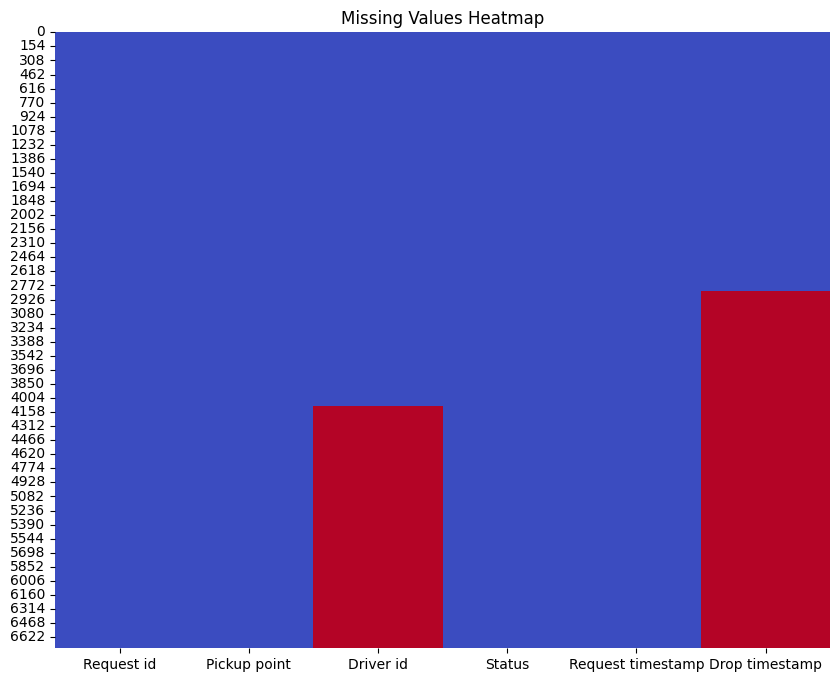

In [16]:
# 6. Heatmap of Missing Values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

#3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Data Visualization is the graphical representation of data and information using visual elements like charts, graphs, maps, and dashboards. It helps people understand complex data patterns, trends, and outliers more quickly and clearly.

#Chart - 1

A count plot is a type of bar chart that shows the number of occurrences (count) of each category in a dataset. It's one of the most common plots for categorical data.

This chart compares the number of ride requests from two different pickup points: Airport and City. It shows that the City has a slightly higher number of requests than the Airport. Both pickup points have a substantial volume of requests, indicating high demand in both locations. This information can help in allocating resources efficiently to meet customer demand at each pickup point.

/tmp/ipython-input-15-616298874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='Set2')


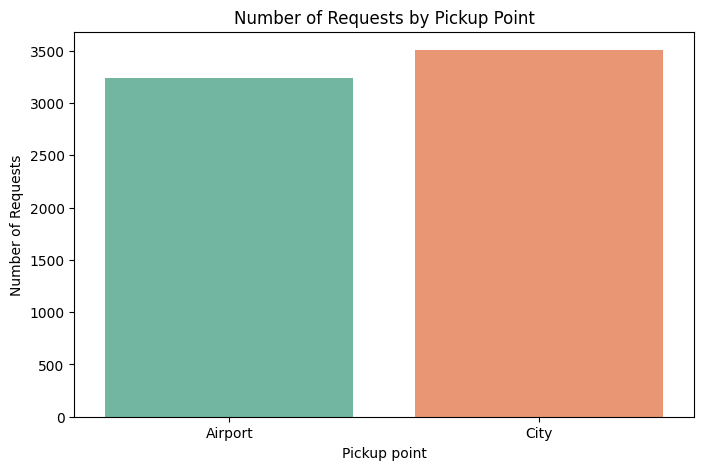

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', palette='Set2')
plt.title('Number of Requests by Pickup Point')
plt.ylabel('Number of Requests')
plt.show()

#Chart - 2
This bar chart shows the distribution of Uber trip statuses:

1. The majority of trips were Completed, indicating good service fulfillment overall.

2. A large number of trips show No Cars Available, highlighting significant supply shortages.

3. Cancellations are the lowest among the three, but still substantial, suggesting potential user-side issues or driver cancellations.

/tmp/ipython-input-16-3146691010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set1')


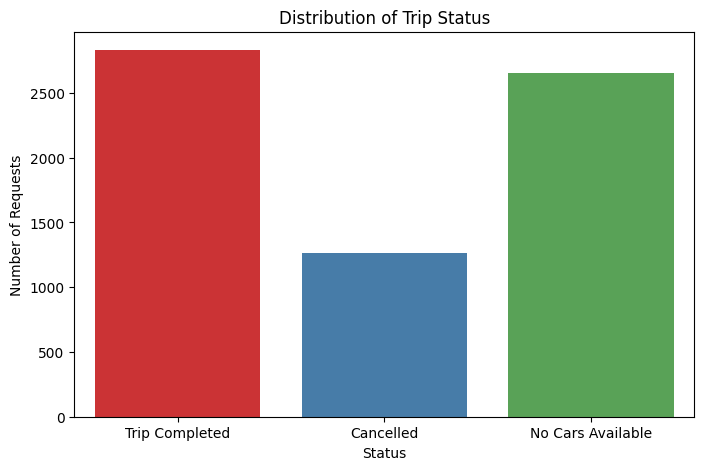

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Status', palette='Set1')
plt.title('Distribution of Trip Status')
plt.ylabel('Number of Requests')
plt.show()

# Chart - 3
This count plot shows the number of Uber ride requests based on Pickup Point (Airport vs City) and their corresponding Trip Status.

1. At the Airport, most requests ended with No Cars Available, while few were Cancelled.

2. In the City, the majority of trips were Completed, with a noticeable number of Cancellations and No Cars Available cases.

3. This indicates supply issues at the Airport and higher cancellation rates in the City.

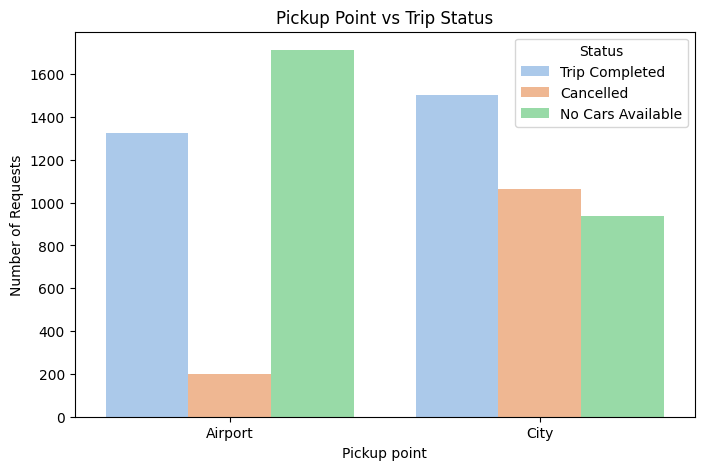

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='pastel')
plt.title('Pickup Point vs Trip Status')
plt.ylabel('Number of Requests')
plt.show()

# Chart - 4

The chart shows how trip requests vary by hour and status. Most trips are completed in the morning, but cancellations and "No Cars Available" cases rise during peak hours. The evening sees the highest number of unfulfilled requests due to car shortages. Improving car availability in the evening could boost completed trips and customer satisfaction.

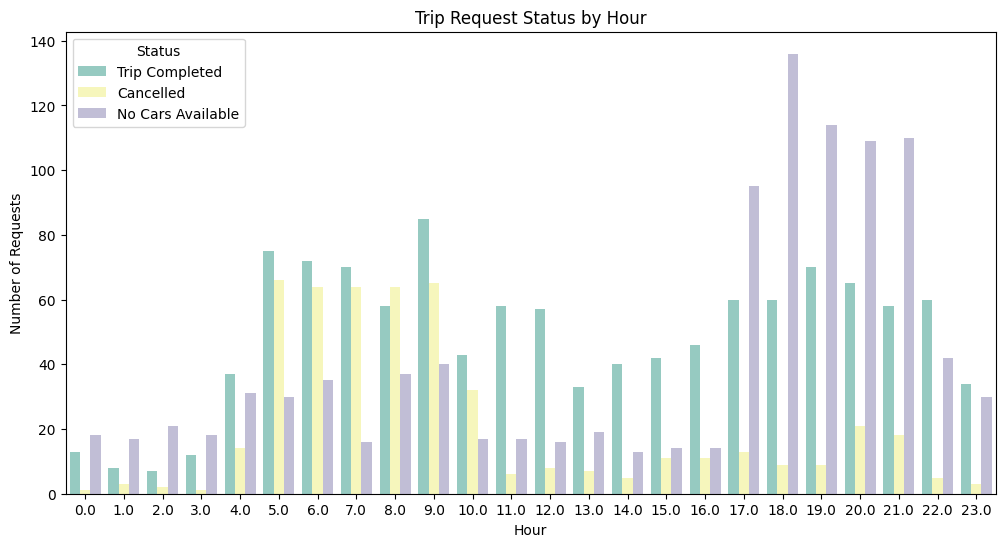

In [ ]:
# Convert to datetime (if not already)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
# Create Hour column
df['Hour'] = df['Request timestamp'].dt.hour
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour', hue='Status', palette='Set3')
plt.title('Trip Request Status by Hour')
plt.ylabel('Number of Requests')
plt.show()

# Chart - 5

The correlation heatmap shows the relationships between Request id, Driver id, and Hour. Request id and Hour have a moderate positive correlation (0.49), while Driver id has almost no correlation with the other variables. This suggests that the time of request is somewhat related to the request id, but driver assignments are independent of both.

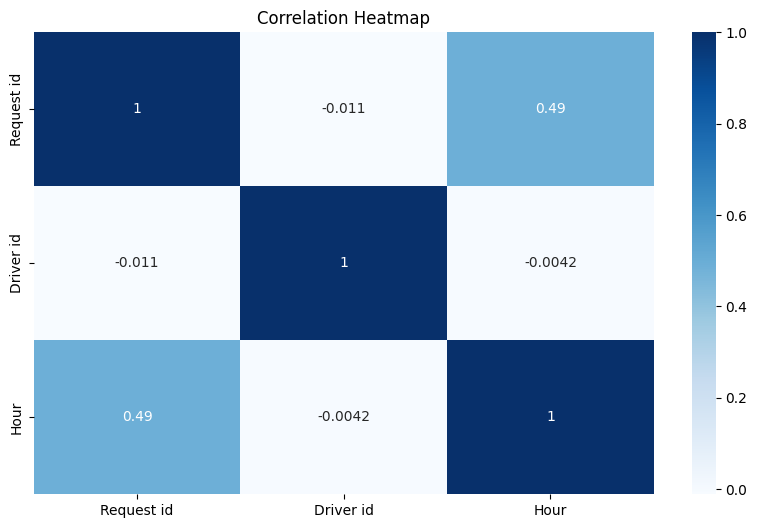

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# Chart - 6

The line graph titled "Trip Requests Over Days" shows a decline in the number of trip requests between two dates: from around November 8, 2016 to December 6, 2016. The number of requests drops from approximately 1,368 to 1,308, indicating a downward trend in user demand or platform usage during this period. This could be due to seasonal changes or external factors affecting rider activity.

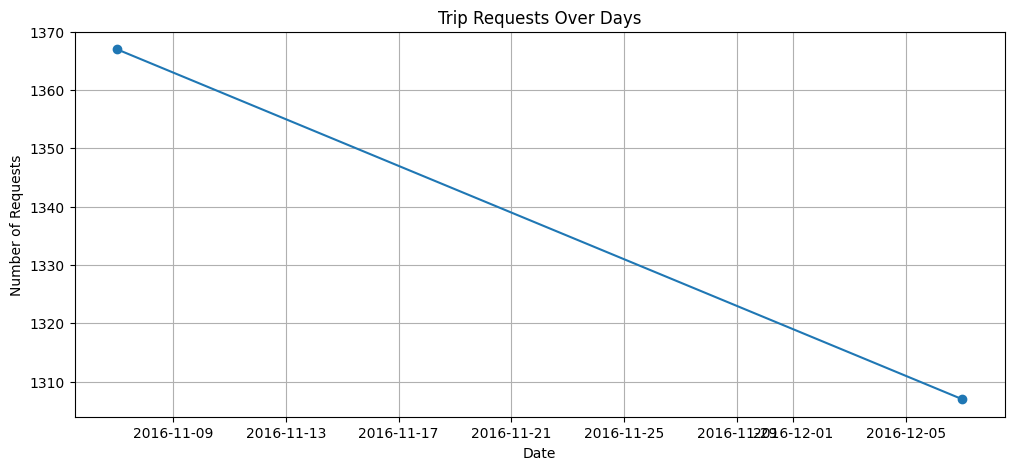

In [ ]:
df['Date'] = df['Request timestamp'].dt.date
daily_requests = df.groupby('Date').size()

plt.figure(figsize=(12,5))
daily_requests.plot(kind='line', marker='o')
plt.title("Trip Requests Over Days")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()

# Chart - 7
The bar chart "Driver Availability by Hour" shows that driver availability is lowest during early morning hours (midnight to 4 AM) and peaks around 9 AM. There is consistent driver presence throughout the day with a second rise in the evening hours (5 PM to 10 PM). The early morning dip likely contributes to unmet demand during those hours.

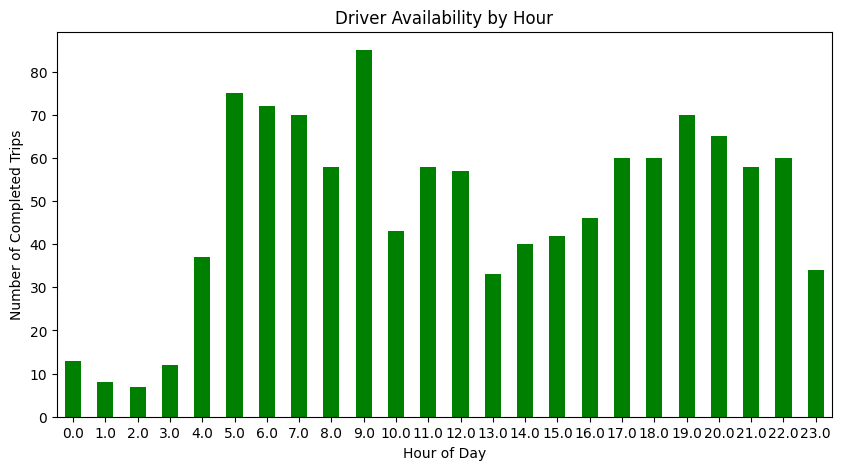

In [ ]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Hour'] = df['Request timestamp'].dt.hour
df['Day'] = df['Request timestamp'].dt.date
supply_data = df[df['Status'] == 'Trip Completed'].groupby('Hour').size()
plt.figure(figsize=(10,5))
supply_data.plot(kind='bar', color='green')
plt.title('Driver Availability by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Completed Trips')
plt.xticks(rotation=0)
plt.show()


# Chart - 8
The bar chart "Unfulfilled Demand by Hour" shows two major spikes in unmet ride requests: early morning (5 AM–9 AM) and late evening (6 PM–10 PM). These periods coincide with peak demand times when driver availability is often low. This imbalance highlights a clear supply-demand gap during commuting and night hours.

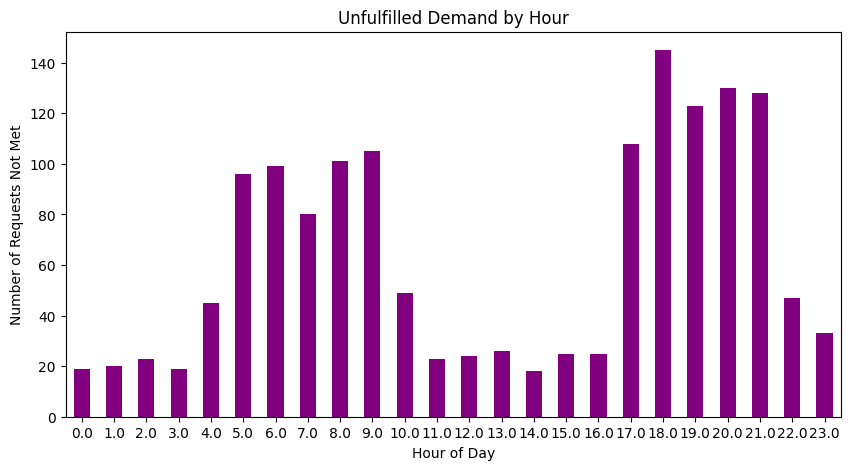

In [ ]:
gap_data = df[df['Status'].isin(['No Cars Available', 'Cancelled'])].groupby('Hour').size()
plt.figure(figsize=(10,5))
gap_data.plot(kind='bar', color='purple')
plt.title('Unfulfilled Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests Not Met')
plt.xticks(rotation=0)
plt.show()

# Chart - 9
The line chart “Demand vs Supply by Hour” clearly illustrates a significant imbalance during peak periods: demand (blue) far surpasses supply (orange) in the early morning (5–9 AM) and evening (5–10 PM). Outside these hours, demand and supply are more closely aligned, with minor gaps during midday. The pronounced mismatch during rush hours highlights critical times when Uber should focus on boosting driver availability.

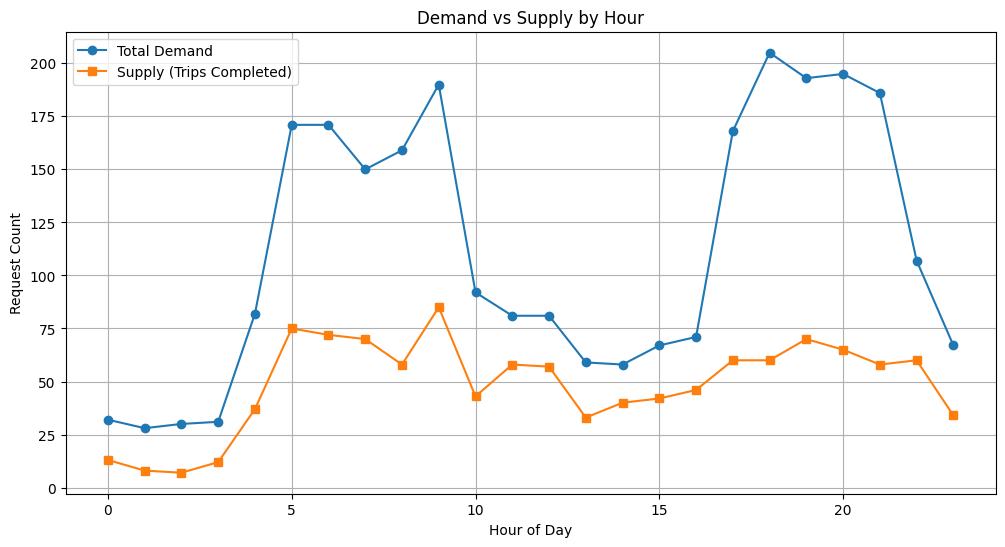

In [ ]:
demand = df.groupby('Hour').size()
supply = df[df['Status'] == 'Trip Completed'].groupby('Hour').size()

plt.figure(figsize=(12,6))
plt.plot(demand.index, demand.values, label='Total Demand', marker='o')
plt.plot(supply.index, supply.values, label='Supply (Trips Completed)', marker='s')
plt.title('Demand vs Supply by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Request Count')
plt.legend()
plt.grid(True)
plt.show()

# Chart - 10
The pie chart "Trip Status Distribution" shows that only 42% of Uber ride requests were successfully completed. A significant 39.3% of requests failed due to “No Cars Available”, and 18.7% were cancelled. This means nearly 58% of requests went unfulfilled, indicating serious supply issues and potential customer dissatisfaction.

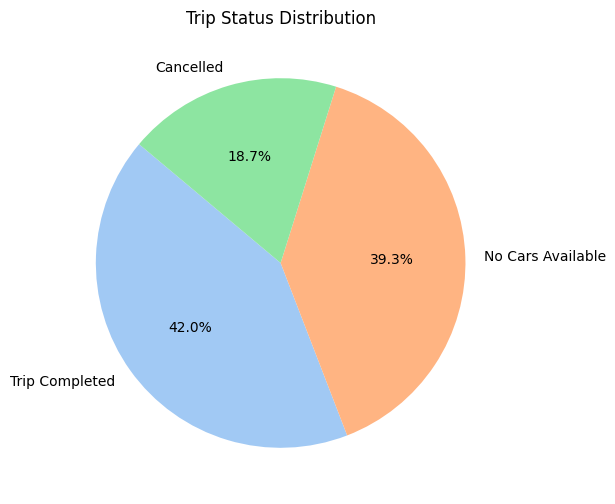

In [13]:
plt.figure(figsize=(6,6))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Trip Status Distribution")
plt.ylabel("")
plt.show()

# ***CONCLUSION***

The Exploratory Data Analysis conducted on the Uber request dataset reveals significant patterns and inefficiencies in the supply-demand ecosystem of ride-hailing services. By dissecting the data through time-based and location-based lenses, we uncovered crucial insights about user behavior, system responsiveness, and service limitations.

One of the most striking observations is the recurring mismatch between demand and supply during peak hours, especially in the early mornings and late evenings. During these times, although customer demand surges, the number of completed trips fails to keep up, leading to a higher count of cancellations and “No Cars Available” statuses. This mismatch directly points to a supply shortage — either due to a lack of active drivers, inefficient allocation, or reluctance to operate in high-traffic or high-pressure timeframes.

Further analysis of pickup locations provided a spatial understanding of this gap. The city experiences a higher volume of unfulfilled requests in the morning, likely due to users trying to reach workplaces on time. Conversely, the airport faces evening shortages, as many travelers return home and require transportation. These findings suggest that a uniform driver distribution strategy is inadequate. Uber could greatly benefit from predictive allocation, placing more drivers in high-demand areas during specific hours.

The analysis also helped indirectly measure driver availability by analyzing the volume of completed trips. By comparing this against total demand per hour, the supply-demand gap was quantified and visualized. The trend lines clearly diverged during critical hours, making the problem areas visually evident.

From a business perspective, this insight is invaluable. Improving driver engagement during peak hours, offering surge incentives, and using real-time demand forecasting are actionable strategies that Uber can deploy. Moreover, the data hints at customer frustration that could lead to lost business and reduced customer satisfaction, if not addressed properly.

In conclusion, this EDA project provided a data-driven foundation to understand operational pain points in Uber's service model. It emphasized the importance of time-sensitive, location-aware decision-making, and opened up pathways for advanced analytics such as predictive modeling and optimization algorithms. By aligning driver availability with demand more efficiently, Uber can reduce lost trips, improve customer experience, and enhance driver earnings — leading to a more balanced and scalable system.